# Machine Learning Lab 7 :-Principal Component Analysis

<hr/>

**Submitted by:-** <br>

Name: **Naveen N S** <br>
Register Number: **20112045** <br>
Class: **4BSCDS** <br> 
<hr/>

# Lab Overview
------------------------------
- Applying PCA on this Binary Dataset for Classification.
- Finding Highly-correlated features so that we can drop one of them and make data lighter (using correlation matrix)
- Comparing the running time and performance with and without PCA.
- The data is related with direct marketing campaigns of a Portuguese banking institution. 

# Problem Definition
------------------------------------------
 
## 1] Apply PCA for the given dataset based on direct marketing campaigns of a Portuguese banking institution

## Problem Approach
-------------------------------------
- Importing necessary libraries
- Loading the given dataset
- Understanding the data by performing basic EDA

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [164]:
#importing data

data = pd.read_csv('bank.csv',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [45]:
# renaming the target variable to make more sense

data.rename(columns={'y':'subscription'},inplace=True)

In [46]:
#getting separate list of categorical and numerical variables

numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

**EDA**

In [47]:
#basic info about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           4521 non-null   int64 
 1   job           4521 non-null   object
 2   marital       4521 non-null   object
 3   education     4521 non-null   object
 4   default       4521 non-null   object
 5   balance       4521 non-null   int64 
 6   housing       4521 non-null   object
 7   loan          4521 non-null   object
 8   contact       4521 non-null   object
 9   day           4521 non-null   int64 
 10  month         4521 non-null   object
 11  duration      4521 non-null   int64 
 12  campaign      4521 non-null   int64 
 13  pdays         4521 non-null   int64 
 14  previous      4521 non-null   int64 
 15  poutcome      4521 non-null   object
 16  subscription  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [48]:
# statistical summary about numeric values

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [49]:
#describing 

data[categorical_columns].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [50]:
#checking for missing values

data.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64

**LABEL ENCODING**

In [56]:
# encoding the data for easy computation

# Importing LabelEncoder from Sklearn blibrary from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

cat_var = ["job","marital","education","default","housing","loan","contact","month","poutcome","subscription"]

for var in cat_var:
    # Using .fit_transform function to fit label
    # encoder and return encoded label
    label = le.fit_transform(data[var])

    # removing the column 'Purchased' from df
    # as it is of no use now.
    data.drop(var, axis=1, inplace=True)

    # Appending the array to our dataFrame
    # with column name 'Purchased'
    data[var] = label

data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0


**VISUALISATION**

IndexError: index 9 is out of bounds for axis 0 with size 9

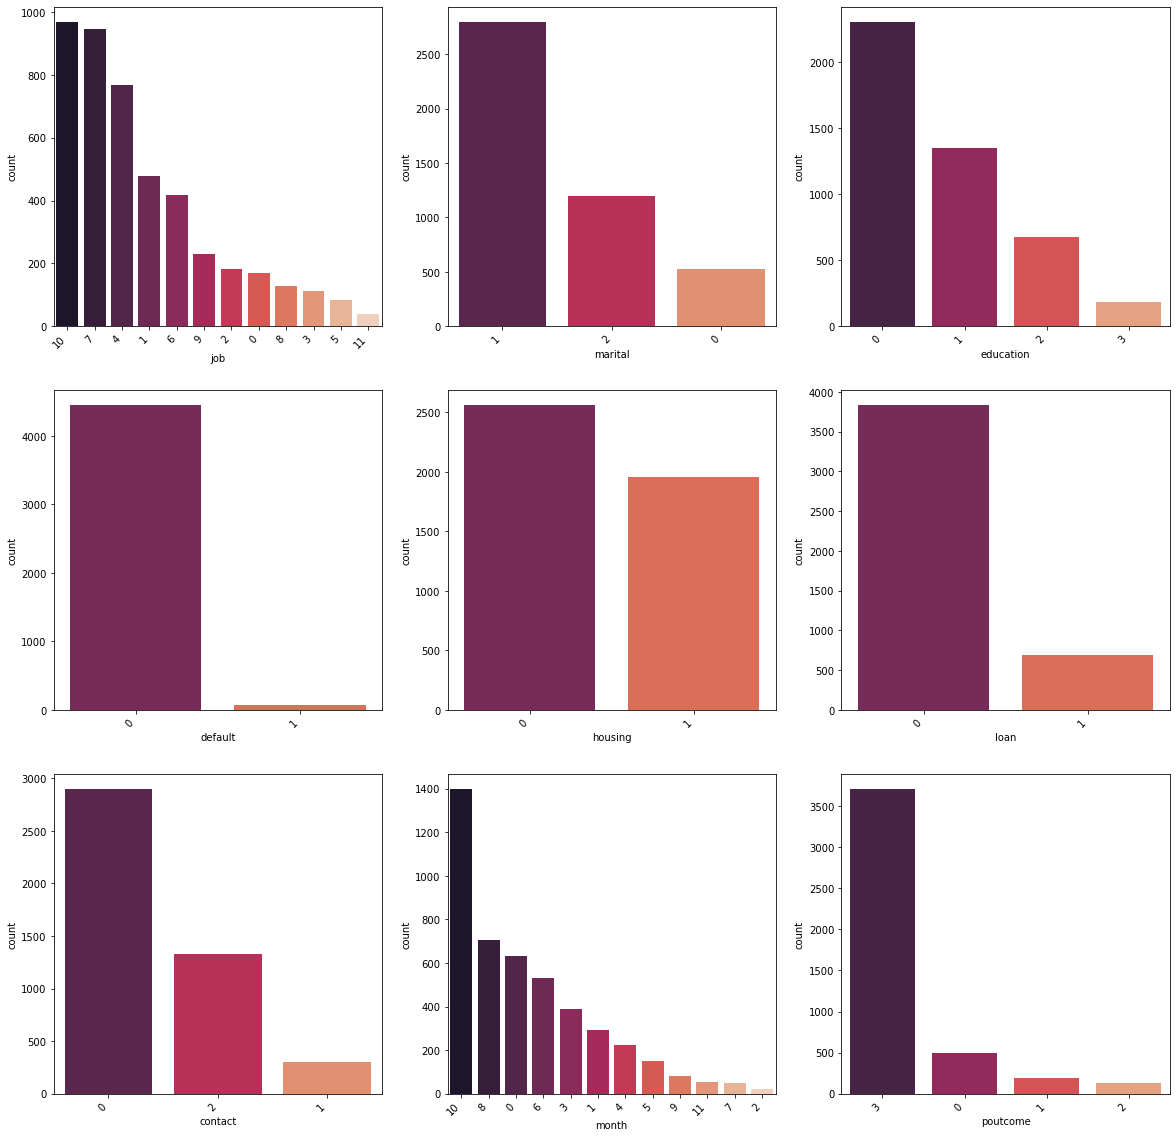

In [57]:
#countplotb
fig, ax = plt.subplots(3,3, figsize = (20,20))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = data, x = categorical_columns[i], ax = ax[i],
                  palette="rocket", order = data[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[categorical_columns[i]].unique(), rotation=45, ha='right')
    
ax = np.reshape(ax, (3, 3))
plt.tight_layout();

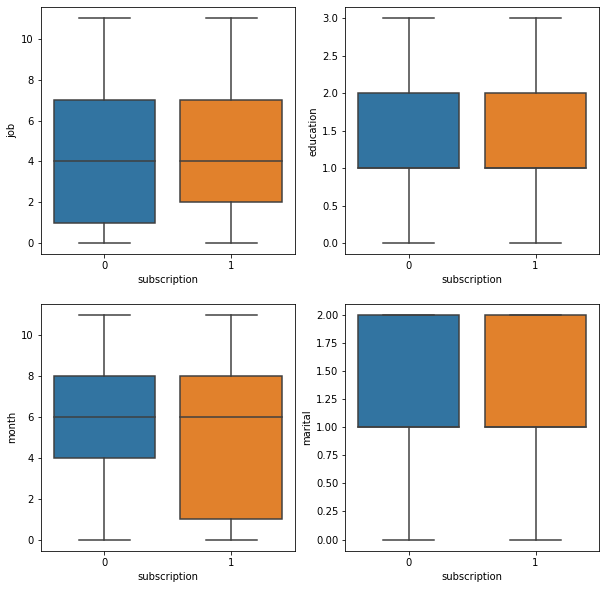

In [62]:
#boxplot
def graph(y):
    sns.boxplot(x="subscription", y=y, data=data)

plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('job')
  
plt.subplot(222)
graph('education')
  
plt.subplot(223)
graph('month')
  
plt.subplot(224)
graph('marital')
  
plt.show()

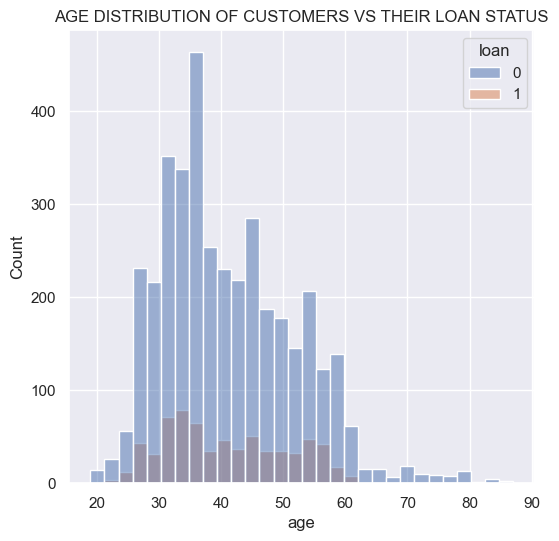

In [142]:
plt.figure(figsize=(6,6),dpi=100)
sns.histplot(data,x="age",hue="loan",bins=30)
plt.title("Age Distribution of Customers vs their Loan status".upper())
plt.show()

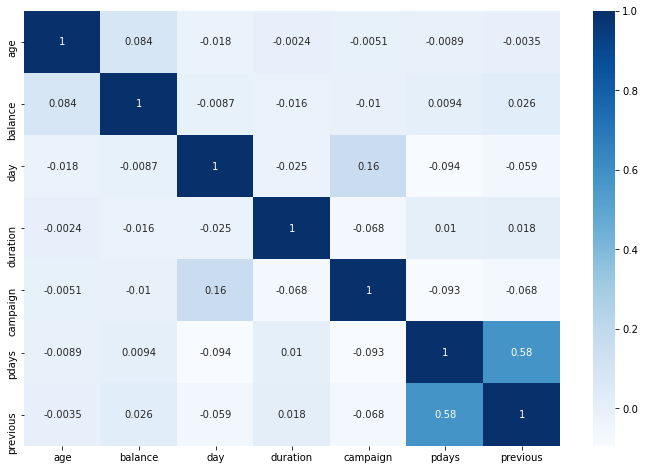

In [14]:
#correlation among columns

# Lets check for correlated data
correlated_data = data.corr()
plt.figure(figsize= (12,8))
sns.heatmap(correlated_data, cmap="Blues", annot=True);

## MANUALLY TRYING TO REDUCE FEATURES WITH THE HELP OF CORRELATION
-------------------------

In [163]:
# getting modulus values of correlation among the features
cor_matrix = data.corr().abs()

# getting the upper triangular matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# finding features with high correlation 
corr_critirion  = [0.95,0.90,0.60,0.50]  #randomly chose limit for correlation

for i in corr_critirion:
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > i)]
    if not to_drop:
        print("No features have correlations greater than {}".format(i))
    else:
        print("When correlation is greater than {}".format(i))
        for j in to_drop:
            print("Columns which could be dropped are:",j)
    print("-"*50)

No features have correlations greater than 0.95
--------------------------------------------------
No features have correlations greater than 0.9
--------------------------------------------------
When correlation is greater than 0.6
Columns which could be dropped are: poutcome
--------------------------------------------------
When correlation is greater than 0.5
Columns which could be dropped are: previous
Columns which could be dropped are: poutcome
--------------------------------------------------


**HERE, THIS METHOD OF MANUALLY DROPPING HIGHLY CORRELATED FEATURE IS NOT THAT APPLICABLE AS NO FEATURE IS HIGHLY RELATED ANY TO OTHER FEATURE, SO ITS BETTER TO PERFORM PCA**

## Performing PCA

**NORMALISING THE DATA**

In [66]:
from sklearn.preprocessing import StandardScaler

In [141]:
data_scaler = StandardScaler()
data_scaler.fit(data)

data_scaled = data_scaler.transform(data)
data_scaled_df = pd.DataFrame(data = data_scaled,columns=data.columns)

data_scaled_df.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,1.716804,-0.246429,-1.644755,-0.130759,-1.142051,-0.424756,-0.723642,1.485414,0.444413,-0.360902
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,0.795246,-0.246429,-0.309038,-0.130759,0.875617,2.354292,-0.723642,0.819288,-2.579961,-0.360902
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,-0.126313,1.421396,1.026680,-0.130759,0.875617,-0.424756,-0.723642,-1.845220,-2.579961,-0.360902
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,-0.126313,-0.246429,1.026680,-0.130759,0.875617,2.354292,1.495133,0.153161,0.444413,-0.360902
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,-1.047871,-0.246429,-0.309038,-0.130759,0.875617,-0.424756,1.495133,0.819288,0.444413,-0.360902


**PCA**

In [77]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=3)
pca.fit(data_scaled)

data_pca = pca.transform(data_scaled)
data_pca_df = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])

data_pca_df.head()

,PC1,PC2,PC3
0,-0.616436,0.079283,-0.386085
1,4.345422,-1.509392,-0.454579
2,3.621353,0.532629,-1.663946
3,-0.997729,-1.350861,-0.946716
4,-0.938652,-2.028705,1.310424


**BY ADDING TARGET (SUBSCRIPTION), WE HAVE SUCCESSFULLY REDUCED THE NUMBER OF FEATURES FROM 16 TO 3**

In [81]:
data_pca_df['Target'] = data['subscription']
data_pca_df

,PC1,PC2,PC3,Target
0,-0.616436,0.079283,-0.386085,0
1,4.345422,-1.509392,-0.454579,0
2,3.621353,0.532629,-1.663946,0
3,-0.997729,-1.350861,-0.946716,0
4,-0.938652,-2.028705,1.310424,0
...,...,...,...,...
4516,-0.681583,0.370912,-0.843717,0
4517,-1.330582,-1.772446,0.441954,0
4518,-0.910591,2.335481,0.794276,0
4519,2.696934,0.210290,-0.307953,0


# Problem Definition
-----------------------------------

## 2] Compare the running time and performance with and without PCA.

# Problem Approach
----------------------------------------
- Importing necessary libraries
- Performing Logistic Regression on the original dataset and PCA dataset separately
- Comparing running time and performance based on evaualtion metrics such as accuracy_score

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [136]:
"""

LOGISTIC REGRESSION FOR ORIGINAL DATA

"""

start1 = time.time()

model = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(data,data['subscription'])
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("*"*70)
print("ORIGINAL DATASET RESULTS AND RUNTIME".center(70))
print("*"*70)
print()
print("Original Dataset Accuracy: ",accuracy_score(y_test,y_pred))
print("-"*70)

end1 = time.time()
print("The time of execution of above program is :", end1-start1)
print()


"""

LOGISTIC REGRESSION FOR PCA DATA

"""

print()
start2= time.time()

model = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(data_pca_df,data['subscription'],test_size=.99)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("*"*70)
print("PCA DATASET RESULTS AND RUNTIME".center(70))
print("*"*70)
print()
print("PCA Dataset Accuracy: ",accuracy_score(y_test,y_pred))
print("-"*70)

end2 = time.time()
print("The time of execution of above program is :{} {}".format(end2-start2,"seconds"))

**********************************************************************
                 ORIGINAL DATASET RESULTS AND RUNTIME                 
**********************************************************************

Original Dataset Accuracy:  0.9177718832891246
----------------------------------------------------------------------
The time of execution of above program is : 0.07016634941101074


**********************************************************************
                   PCA DATASET RESULTS AND RUNTIME                    
**********************************************************************

PCA Dataset Accuracy:  0.9488382484361036
----------------------------------------------------------------------
The time of execution of above program is :0.013034582138061523 seconds


### INFERENCE
-------------------

For the following dataset:
- Accuracy score of PCA dataset > Accuracy of original dataset
- Program Runtime of PCA dataset < Program Runtime of original dataset


**Thus, its a win-win situation here...!**

**SCATTERPLOT**

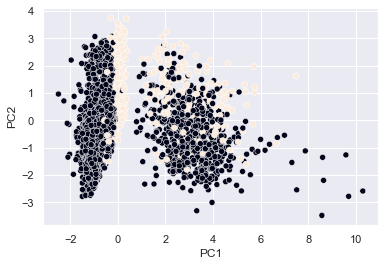

In [140]:
sns.set()
bcdp=data_pca_df
sns.scatterplot(bcdp['PC1'],bcdp['PC2'],c=bcdp['Target']);

**SCREE PLOT**

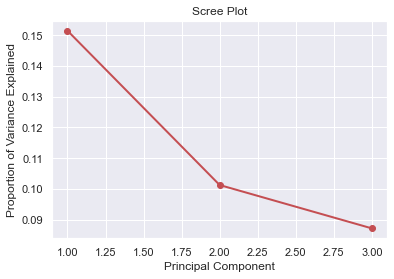

In [138]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# References
----------------------------

- https://www.kaggle.com/datasets/berkayalan/bank-marketing-data-set
- https://www.geeksforgeeks.org/how-to-check-the-execution-time-of-python-script/
- https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis

# Conclusion
-------------------------------
- Learnt the importance of PCA while handling large datasets
- Implemented PCA using PCA command of sklearn.decomposition library
- Learnt how to find and drop highly correlated features in-order to ease computation
- Applied Logistic Regression to predict the target varibable (subscription) using both original and PCA dataset
- Compared predictions of both models and found out that PCA model was more accurate and also used less runtime
- Showed that visualising with PCA data is much easier
- Plotted scree plot